**PCA-** Principal Component Analysis

- Reduce the number of a variable of a dataset, while preserving as much as information as possible.

**HOW PCA WORKS??**

1- Standardize the data - (This puts all the features on the same scale)

2- Compute the covariance matrix (to identify correlation)

3- Calculate eigenvalues and eigenvectors of the covariance matrix

4- sort the eigen values in descending order to pick the highest one

5- transform the data

In [ ]:
from sklearn import datasets

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
data = load_digits()

In [ ]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

- each image is a tiny 8 x 8 square -> 64 features
- 8x8 = 64 pixels value
- it means each image is represented as 64 features(64 pixels value)

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
df['Target'] = data.target

In [ ]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [ ]:
print("Target is ",data.target[0])
data.data[0]

Target is  0


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

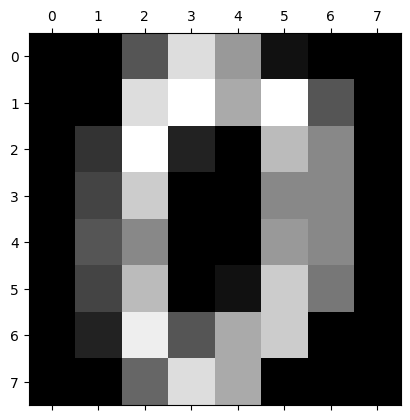

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(data.data[0].reshape(8,8))
plt.show()

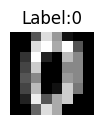

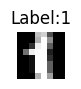

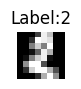

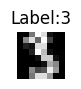

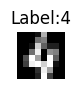

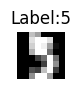

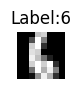

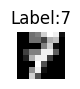

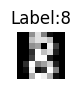

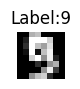

In [ ]:
# check my target -> images (0-9)

num_images = 10
plt.figure(figsize=(10,5))
for i in range(num_images):
  plt.subplot(1,10,i+1)
  plt.imshow(data.images[i],cmap='gray')
  plt.title(f'Label:{data.target[i]}')
  plt.axis('off')
  plt.tight_layout()
  plt.show()


In [ ]:
df.shape

(1797, 65)

In [ ]:
# Split the data into x and y

In [ ]:
x = df.iloc[:,:-1]
y = data.target

In [ ]:
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
x.shape

(1797, 64)

**let's apply PCA here-**

In [ ]:
# STEP 1- Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [ ]:
# STEP 2- COMPUTE COVARIANCE MATRIX-
# inorder to find out the relation b/w features -

In [ ]:
x1 = x_scaled.T
pd.DataFrame(x1)

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,...,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016
2,-0.043081,-1.094937,-1.094937,0.377661,-1.094937,1.429517,-1.094937,0.377661,0.798404,1.219146,...,1.008775,-1.094937,0.588032,-0.043081,-1.094937,-0.253452,0.167290,-0.884566,-0.674195,1.008775
3,0.274072,0.038648,-1.844742,0.744919,-2.551014,-0.432200,0.038648,-0.903047,0.509495,0.038648,...,0.980343,-2.551014,0.980343,0.038648,-2.080166,-0.432200,0.980343,-0.196776,-0.432200,0.509495
4,-0.664478,0.268751,0.735366,0.268751,-0.197863,-2.764242,0.268751,0.268751,-0.897785,-2.764242,...,0.735366,0.035444,-2.064321,-0.897785,0.735366,0.268751,0.268751,0.735366,-1.131092,-0.897785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.208293,-0.249010,-2.078218,0.208293,-2.306869,0.894246,-0.706312,-1.620916,0.894246,-0.020358,...,0.208293,-2.764171,0.894246,-0.020358,-2.535520,0.436944,0.894246,-0.706312,-0.020358,-0.020358
60,-0.366771,0.849632,-0.164037,0.241430,0.849632,0.849632,0.646898,-2.394110,0.646898,0.241430,...,-0.366771,0.444164,-0.366771,0.038697,0.849632,0.646898,0.444164,0.241430,0.849632,0.444164
61,-1.146647,0.548561,1.565686,0.379040,-0.468564,0.548561,0.718081,-1.146647,0.718081,-0.638085,...,-0.468564,0.379040,-0.977127,-0.638085,-0.468564,0.379040,-0.129523,-0.129523,0.887602,0.887602
62,-0.505670,-0.505670,1.695137,-0.505670,-0.505670,-0.505670,0.227932,-0.505670,-0.261136,-0.505670,...,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.261136


In [ ]:
cov_mat = np.cov(x_scaled.T)
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000557,0.556928,0.207929,-0.018771,0.060810,0.048415,-0.038948,0.032338,0.556682,...,0.030970,-0.045368,-0.007910,0.856086,0.556036,0.147728,-0.102406,-0.029887,0.026562,-0.043913
2,0.0,0.556928,1.000557,0.560492,-0.084282,0.043593,0.002842,-0.062313,0.022324,0.582583,...,0.050877,-0.003806,-0.025851,0.515563,0.938145,0.500118,-0.134829,-0.041206,0.072639,0.082569
3,0.0,0.207929,0.560492,1.000557,0.023952,-0.171473,-0.115796,-0.040162,0.035683,0.328527,...,0.139475,0.075376,-0.049112,0.175902,0.560638,0.768373,-0.065993,-0.054966,0.053467,0.082016
4,0.0,-0.018771,-0.084282,0.023952,1.000557,0.508014,0.127835,0.010070,0.042089,0.051686,...,-0.265116,-0.212339,0.017362,-0.047250,-0.020187,-0.008872,-0.082171,-0.215929,-0.250838,-0.215469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.147728,0.500118,0.768373,-0.008872,-0.068076,-0.045871,0.001013,0.043398,0.305361,...,0.094770,0.050060,-0.038269,0.113035,0.481979,1.000557,0.058423,-0.095009,0.006853,0.099727
60,0.0,-0.102406,-0.134829,-0.065993,-0.082171,-0.351342,-0.383735,-0.178343,0.049024,-0.000604,...,0.394499,0.105160,0.005700,-0.117973,-0.208072,0.058423,1.000557,0.609854,0.243441,0.103073
61,0.0,-0.029887,-0.041206,-0.054966,-0.215929,-0.268967,-0.304281,-0.141253,0.033428,0.071528,...,0.707913,0.262942,-0.003058,-0.043913,-0.091890,-0.095009,0.609854,1.000557,0.648689,0.262137
62,0.0,0.026562,0.072639,0.053467,-0.250838,-0.267808,-0.179044,-0.063256,0.020700,0.111631,...,0.602602,0.512011,-0.011939,0.014565,0.035388,0.006853,0.243441,0.648689,1.000557,0.620774


In [ ]:
# STEP 3 - EIGEN VALUE AND EIGEN VECTOR OF COVARIANCE MATRIX -

In [ ]:
# eigenvectors -> the new directions along which the data is spread out the most
# eigenvalues -> tells us how much imformation(variance) is captured along with each eigenvector

In [ ]:
eig_vals , eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
pd.DataFrame(eig_vals)

,0
0,7.344776
1,5.835491
2,5.153961
3,3.966236
4,2.966345
...,...
59,0.200091
60,0.189835
61,0.000000
62,0.000000


In [ ]:
pd.DataFrame(eig_vecs)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,0.182234,-0.047027,0.023588,-0.178153,-0.029978,0.231723,-0.108310,0.125524,0.213820,0.059834,...,0.039356,-0.036629,0.082404,0.052290,0.197267,0.024853,0.052605,0.0,0.0,0.0
2,0.285868,-0.059565,-0.056799,-0.156129,-0.014666,0.119875,-0.004755,0.006178,0.120140,0.007681,...,-0.080164,0.176636,0.091203,-0.001822,-0.129372,-0.069592,-0.090823,0.0,0.0,0.0
3,0.220370,0.020804,-0.040464,-0.167800,0.043716,-0.100392,0.233717,-0.033408,-0.101895,-0.021639,...,0.125306,-0.224852,-0.089657,0.040788,-0.148353,0.052446,-0.323498,0.0,0.0,0.0
4,-0.025170,-0.155903,-0.067065,0.000009,-0.139993,-0.093471,-0.039540,0.046161,-0.093102,0.005066,...,0.049967,-0.024456,0.039529,0.012110,-0.072823,-0.057241,0.048470,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.194449,0.009905,-0.083464,-0.171490,0.100375,-0.086503,0.135319,-0.098852,-0.115978,-0.105825,...,-0.067003,0.101720,-0.245611,-0.069682,0.336075,0.080163,0.138750,0.0,0.0,0.0
60,0.017774,0.251934,-0.062455,0.154438,-0.003774,0.111832,-0.172848,-0.055067,-0.154210,-0.100353,...,-0.116854,0.219353,0.196726,0.048100,-0.189613,-0.081401,-0.036926,0.0,0.0,0.0
61,0.103198,0.242618,-0.022280,0.252432,0.094738,0.057756,-0.032155,0.034265,-0.027141,-0.036675,...,0.193102,-0.023445,0.152260,-0.131265,-0.019375,-0.033929,-0.168659,0.0,0.0,0.0
62,0.119811,0.165089,0.100366,0.160720,0.244026,0.028957,0.077612,-0.164484,0.144245,0.057176,...,0.067240,0.095552,-0.207269,0.284186,0.086148,-0.141619,0.094642,0.0,0.0,0.0


In [ ]:
# Explained Variance = It is the amount of variance(information) our each component captures from the original dataset

In [ ]:
tot = sum(eig_vals)

In [ ]:
tot

np.float64(61.033964365256246)

In [ ]:
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse = True)]

In [ ]:
var_exp

[np.float64(12.0339160977349),
 np.float64(9.561054403097925),
 np.float64(8.444414892624541),
 np.float64(6.498407907524162),
 np.float64(4.860154875966386),
 np.float64(4.214119869271926),
 np.float64(3.942082803567374),
 np.float64(3.389380924638331),
 np.float64(2.998221011625225),
 np.float64(2.9320025512522148),
 np.float64(2.781805463550305),
 np.float64(2.577055092581998),
 np.float64(2.275303315764246),
 np.float64(2.2271797395143564),
 np.float64(2.165229431849247),
 np.float64(1.9141666064421292),
 np.float64(1.7755470851682091),
 np.float64(1.6380692742844192),
 np.float64(1.5964601688623465),
 np.float64(1.4891911870878212),
 np.float64(1.3479695658179427),
 np.float64(1.27193137023478),
 np.float64(1.1658373505919553),
 np.float64(1.057646598536325),
 np.float64(0.9753159471981092),
 np.float64(0.9445589897320044),
 np.float64(0.8630138269707233),
 np.float64(0.836642853668514),
 np.float64(0.7976932484112421),
 np.float64(0.7464713709260657),
 np.float64(0.72558215137027

In [ ]:
cum_var_exp = np.cumsum(var_exp)
pd.DataFrame(cum_var_exp)

,0
0,12.033916
1,21.594971
2,30.039385
3,36.537793
4,41.397948
...,...
59,99.917465
60,100.000000
61,100.000000
62,100.000000


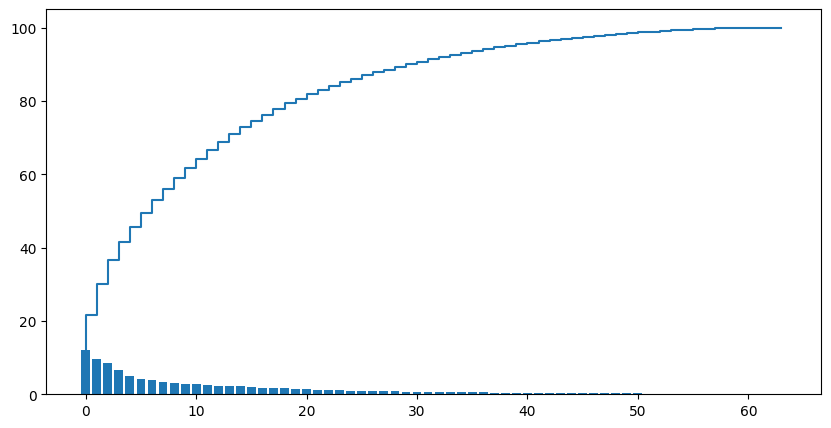

In [ ]:
# screeplot->
plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)),var_exp,label='Individuale explained variance')
plt.step(range(len(cum_var_exp)),cum_var_exp,label='cumulative explained varaince')
plt.show()


In [ ]:
# Apply PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(0.95) # this tells pca to retain enough components such that 95% variance is captured

In [ ]:
x_pca = pca.fit_transform(x)

In [ ]:
x_pca.shape

(1797, 29)

In [ ]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x_train_pca , x_test_pca , y_train , y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_pca,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test_pca)

In [ ]:
from sklearn.metrics import *


In [ ]:
accuracy_score(y_pred,y_test)*100

96.11111111111111